<a href="https://colab.research.google.com/github/TheSpaceMan915/Artificial-Intelligence/blob/main/Lab14_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №14  Колычев Никита  ВПР34**

In [ ]:
#@title Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import string
from pathlib import Path
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, \
BatchNormalization, Embedding, LSTM, Bidirectional, \
Input

# **Functions**

In [ ]:
def remove_punctuation(text):
  cleared_text = re.sub("[^a-zA-Z]", " ", text)
  return cleared_text

In [ ]:
def create_list_tokens(text):
  list_tokens = word_tokenize(text, language="english")
  return list_tokens

In [ ]:
def remove_stopwords(list_tokens):
  list_stopwords = nltk.corpus.stopwords.words("english")
  cleared_list_tokens = [token for token in list_tokens if token not in list_stopwords]
  return cleared_list_tokens

In [ ]:
def create_list_lemmas(list_words):
  lemmatizer = WordNetLemmatizer()
  list_lemmas = [lemmatizer.lemmatize(word) for word in list_words]
  return list_lemmas

In [ ]:
def create_model(input_layer_shape):
  model = Sequential([
    Dense(64, activation='relu',input_shape=input_layer_shape, kernel_initializer="he_uniform"),
    # Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_initializer="he_uniform"),
    # Dropout(0.2),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
  ])

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

In [ ]:
def evaluate_model(func_create_model, input_layer_shape, dataset_train, dataset_test, labels_train, labels_test):
  kfold = KFold(5, shuffle=True, random_state=11)
  list_model_histories = []
  list_scores = []
  
  for train_index, validate_index in kfold.split(dataset_train):
    model = func_create_model(input_layer_shape)
    part_dataset_train, part_labels_train, part_dataset_validate, part_labels_validate = dataset_train[train_index], labels_train[train_index], dataset_train[validate_index], labels_train[validate_index]

    model_history = model.fit(part_dataset_train, part_labels_train,
                              epochs=30, batch_size=1024,
                              verbose=0, validation_data=(part_dataset_validate, part_labels_validate))
    _, accuracy = model.evaluate(dataset_test, labels_test, verbose=1)

    list_model_histories.append(model_history)
    list_scores.append(accuracy)
  
  dict_results = {"list_model_histories": list_model_histories, "list_scores": list_scores}
  return dict_results

In [ ]:
def plot_history(history_model):
  fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(14,5))
  plt.rcParams.update({"font.size": 14, "font.family": "serif"})
  
  axes1.plot(history_model.history["accuracy"], label="accuracy")
  axes1.plot(history_model.history["val_accuracy"], label="val_accuracy")
  axes1.set(title="Model accuracy")
  axes1.set(xlabel="Epoch")
  axes1.set(ylabel="Accuracy")
  axes1.legend(loc=4)

  axes2.plot(history_model.history["loss"], label="loss")
  axes2.plot(history_model.history["val_loss"], label="val_loss")
  axes2.set(title="Model loss")
  axes2.set(xlabel="Epoch")
  axes2.set(ylabel="Loss")
  axes2.legend(loc=1)
  fig.tight_layout()

In [ ]:
def plot_box(list_scores):
  # printing average scores
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(list_scores)*100, np.std(list_scores)*100, len(list_scores)))

  # plotting a boxplot using the scores
  plt.figure(figsize=(8, 8))
  plt.boxplot(list_scores)
  plt.show()

In [ ]:
def read_file(path):
  with open(path) as f:
    text = f.read()
  return text

In [ ]:
def clear_text(text):
	# replace '--' with a space ' '
	text = text.replace('--', ' ')
 
	# split into tokens by white space
	tokens = text.split()
 
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]

	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]

	# make lower case
	tokens = [word.lower() for word in tokens]

	# remove stopwords
	cleared_list_tokens = remove_stopwords(tokens)
	return cleared_list_tokens

In [ ]:
def write_file(path, list_lines):
  text = "\n".join(list_lines)
  with open(path, "w") as f:
    f.write(text)

In [ ]:
def create_text_from_words(list_words):
  text = ""
  for word in list_words:
    text += " " + word

  text = text.strip()
  return text  

# **Задание 1**
Найти текстовый датасет для задачи классификации. Решить ее одним методом классического машинного обучения и методом глубокого обучения на основе нейронных сетей.

In [ ]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# don't forget to load kaggle.json to the content folder before
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

 91% 3.00M/3.30M [00:00<00:00, 30.2MB/s]
100% 3.30M/3.30M [00:00<00:00, 30.6MB/s]


In [ ]:
!mkdir datasets
!mv /content/news-headlines-dataset-for-sarcasm-detection.zip  /content/datasets
!unzip -q /content/datasets/news-headlines-dataset-for-sarcasm-detection.zip -d /content/datasets
!rm -rf /content/datasets/news-headlines-dataset-for-sarcasm-detection.zip

In [ ]:
path_dataset = Path("/content/datasets/Sarcasm_Headlines_Dataset_v2.json")
df = pd.read_json(path_dataset, lines=True, nrows=13000)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
print("df shape:", df.shape)

df shape: (28619, 3)


In [ ]:
arr_labels = df["is_sarcastic"].values
print(arr_labels)

[1 0 0 ... 0 1 1]


In [ ]:
# clearing the text
list_headlines = []
for headline in df["headline"]:
  cleared_headline = remove_punctuation(headline)
  list_tokens = create_list_tokens(cleared_headline)
  # cleared_list_tokens = remove_stopwords(list_tokens)
  list_lemmas = create_list_lemmas(list_tokens)
  cleared_text = " ".join(list_lemmas)
  list_headlines.append(cleared_text)

In [ ]:
for i in range(10):
  print(list_headlines[i])

thirtysomething scientist unveil doomsday clock of hair loss
dem rep totally nail why congress is falling short on gender racial equality
eat your veggie deliciously different recipe
inclement weather prevents liar from getting to work
mother come pretty close to using word streaming correctly
my white inheritance
way to file your tax with le stress
richard branson s global warming donation nearly a much a cost of failed balloon trip
shadow government getting too large to meet in marriott conference room b
lot of parent know this scenario


In [ ]:
# creating a bag of words (document-term matrix)
vectorizer = CountVectorizer(stop_words="english")
arr_words = vectorizer.fit_transform(list_headlines).toarray()
print("matrix shape:", arr_words.shape)

matrix shape: (13000, 15726)


In [ ]:
print(arr_words[0][:400])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kfold = KFold(5, shuffle=True, random_state=11)
dataset_train, dataset_test, labels_train, labels_test = train_test_split(arr_words, arr_labels, 
                                                                                  test_size=0.2, random_state=11)
input_layer_shape = (dataset_train.shape[1],)

In [ ]:
# predicting using AdaBoost Classifier and KFold validator (takes a hell of a lot of time)
fitted_classifier = None
for train_index, validate_index in kfold.split(dataset_train):
  classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(),
                                n_estimators=100, random_state=11)
  part_dataset_train, part_labels_train, part_dataset_validate, part_labels_validate = dataset_train[train_index], labels_train[train_index], dataset_train[validate_index], labels_train[validate_index]

  fitted_classifier = classifier.fit(part_dataset_train, part_labels_train)
  accuracy = fitted_classifier.score(part_dataset_validate, part_labels_validate)
  print("accuracy:", accuracy)

accuracy: 0.7147848875300284


In [ ]:
# predicting on test data
accuracy = fitted_classifier.score(dataset_test, labels_test)
print("accuracy:", accuracy)

In [ ]:
# fitting using Logistic Regression
logistic_regressor = LogisticRegression()
logistic_regressor_fitted = logistic_regressor.fit(dataset_train, labels_train)
accuracy = logistic_regressor_fitted.score(dataset_test, labels_test)
print("accuracy:", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.7959468902865129


In [ ]:
# neural network with two layers of 64 and 32 neurons and dropout layers
dict_results = evaluate_model(create_model, input_layer_shape, 
               dataset_train, dataset_test, 
               labels_train, labels_test)

82/82 [==============================] - 1s 11ms/step - loss: 0.6204 - accuracy: 0.6454


{'list_model_histories': [<keras.callbacks.History at 0x7fa198a7eeb0>,
 'list_scores': [0.5926923155784607,
  0.7003846168518066,
  0.7223076820373535,
  0.7346153855323792,
  0.6453846096992493]}

In [ ]:
# neural network with two layers of 64 and 32 neurons without dropout layers
dict_results = evaluate_model(create_model, input_layer_shape, 
                              dataset_train, dataset_test, 
                              labels_train, labels_test)

82/82 [==============================] - 1s 10ms/step - loss: 0.5838 - accuracy: 0.6738


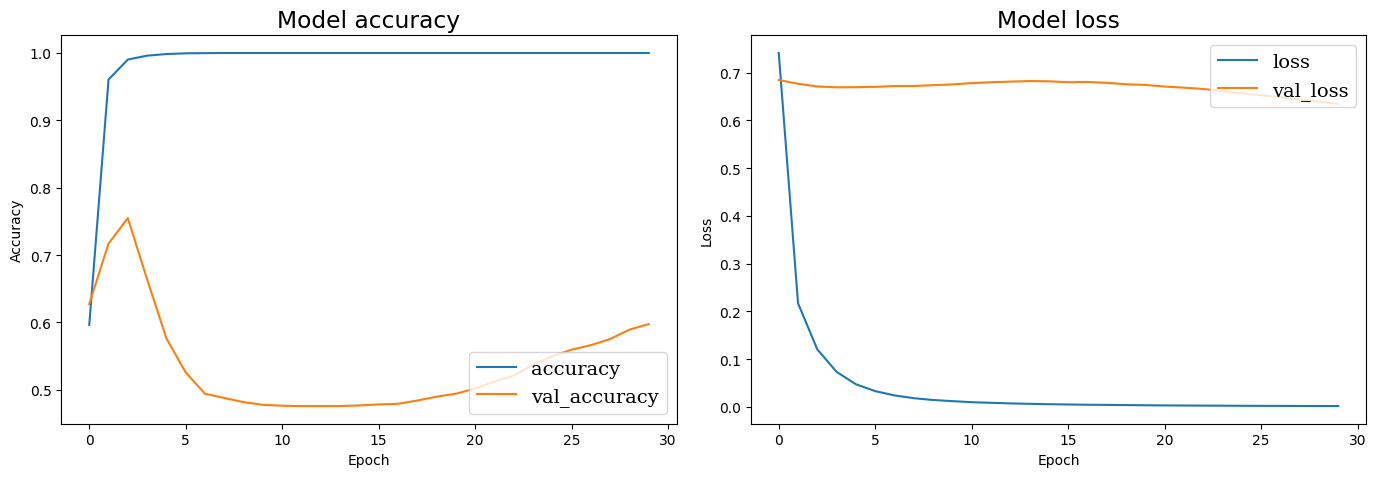

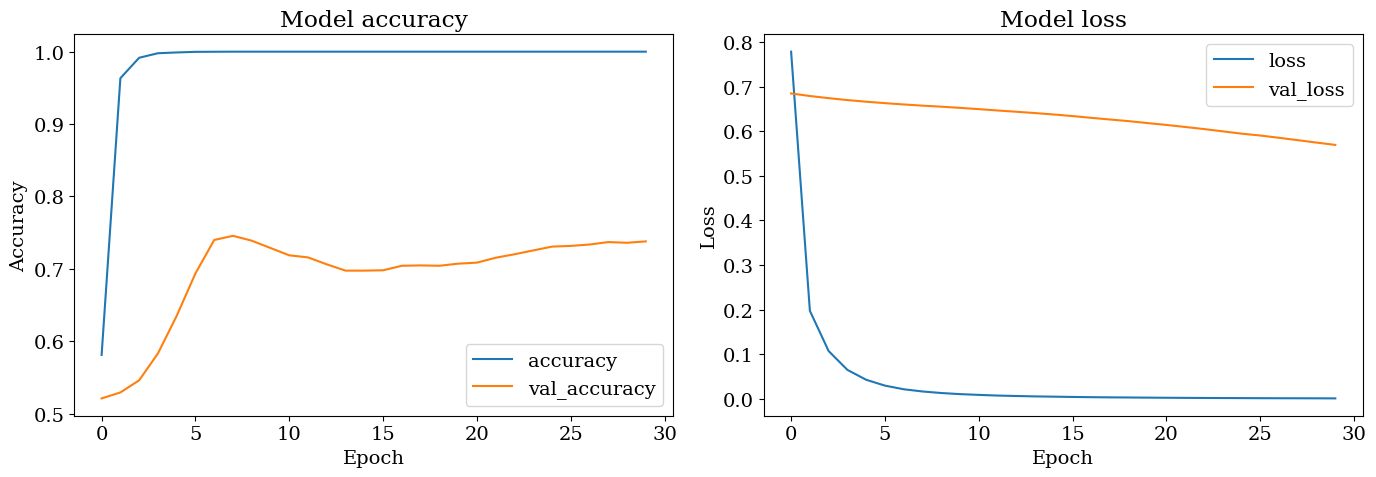

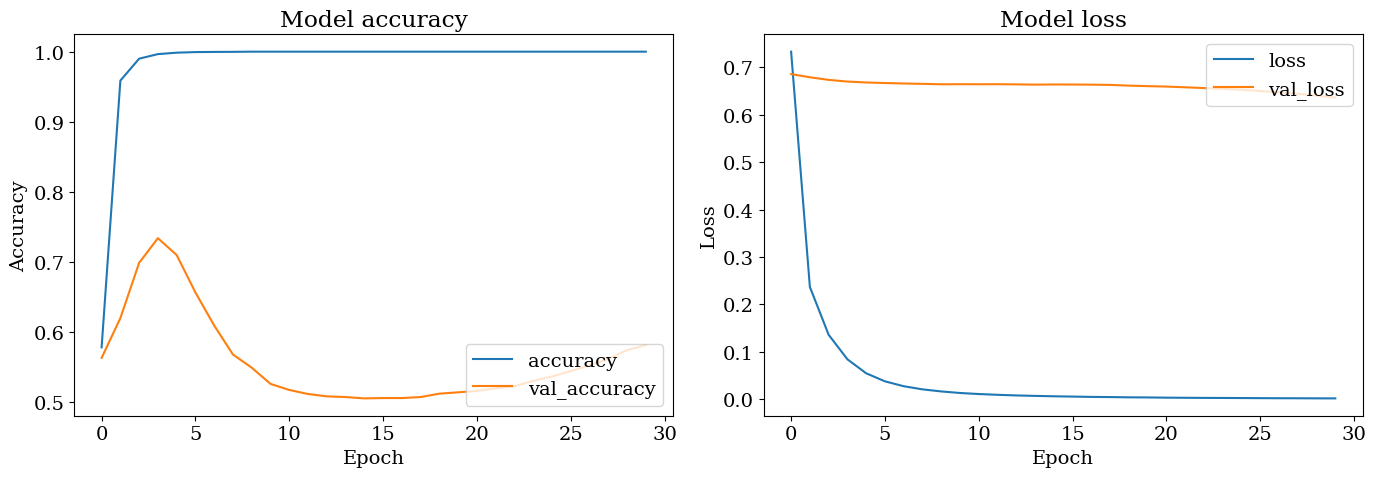

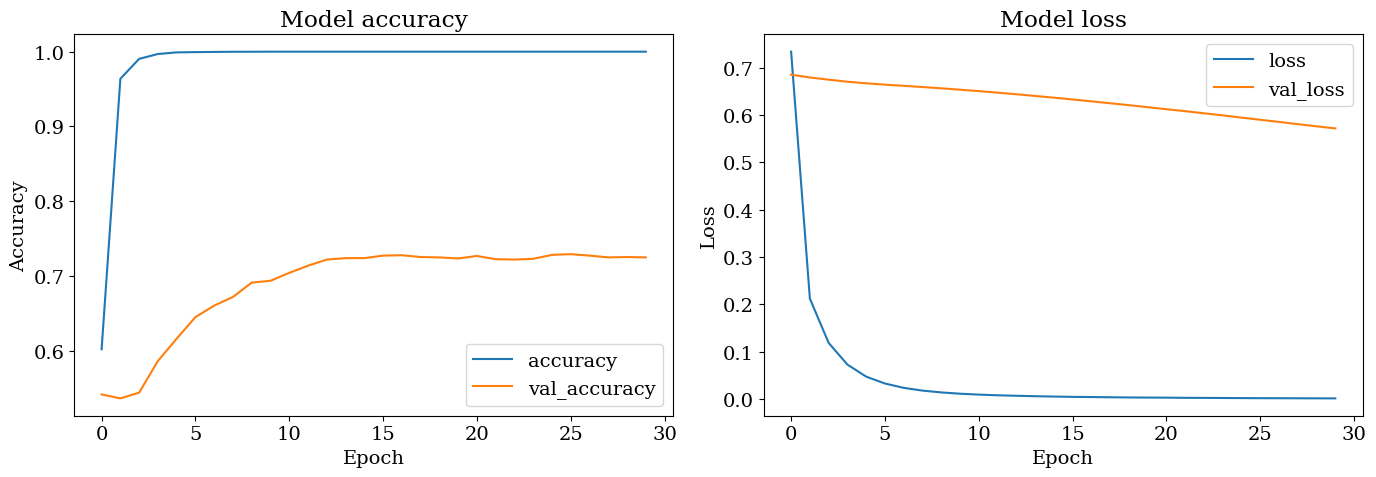

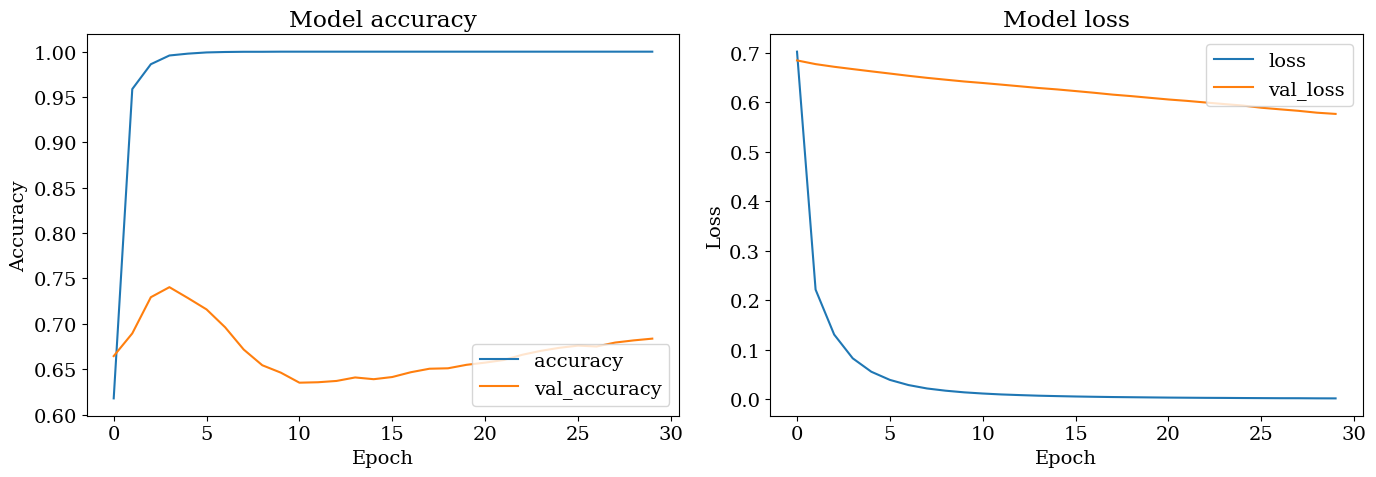

In [ ]:
for history in dict_results["list_model_histories"]:
  plot_history(history)

Accuracy: mean=66.554 std=5.969, n=5


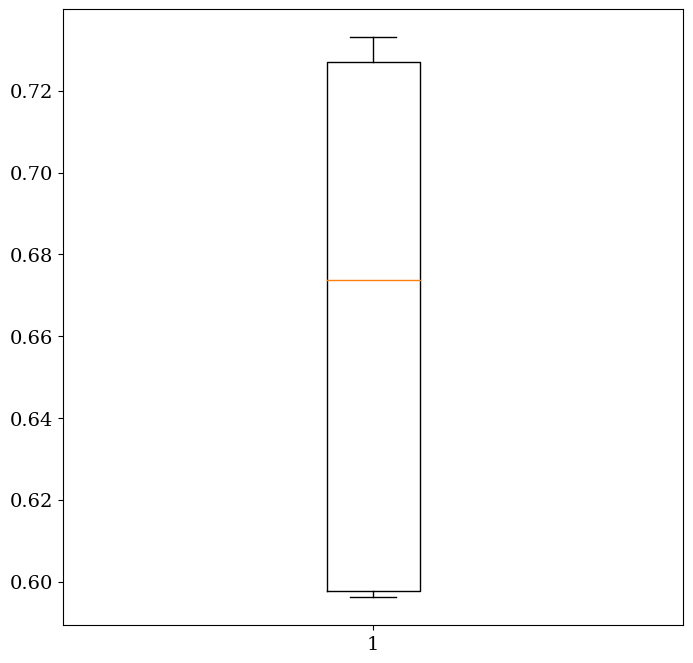

In [ ]:
plot_box(dict_results["list_scores"])

# **Задание 2**

In [ ]:
path = Path("/content/drive/MyDrive/Colab Notebooks/AI/Text files/The Count of Monte Cristo.txt")
text = read_file(path)
print(text[:623])

Chapter 1. Marseilles—The Arrival

On the 24th of February, 1815, the look-out at Notre-Dame de la Garde
signalled the three-master, the _Pharaon_ from Smyrna, Trieste, and
Naples.

As usual, a pilot put off immediately, and rounding the Château d’If,
got on board the vessel between Cape Morgiou and Rion island.

Immediately, and according to custom, the ramparts of Fort Saint-Jean
were covered with spectators; it is always an event at Marseilles for a
ship to come into port, especially when this ship, like the _Pharaon_,
has been built, rigged, and laden at the old Phocee docks, and belongs
to an owner of the city.


In [ ]:
list_tokens = clear_text(text)
print(list_tokens[:15])
print("number of tokens:", len(list_tokens))
print("number of unique tokens:", len(set(list_tokens)))

['chapter', 'arrival', 'february', 'lookout', 'notredame', 'de', 'la', 'garde', 'signalled', 'threemaster', 'pharaon', 'smyrna', 'trieste', 'naples', 'usual']
number of tokens: 198734
number of unique tokens: 15719


In [ ]:
# recodring the frequency of each word
frequnecy_distribution = FreqDist(list_tokens)
frequnecy_distribution.most_common(10)

[('said', 3459),
 ('one', 1362),
 ('man', 1234),
 ('count', 1216),
 ('would', 1197),
 ('monte', 1126),
 ('cristo', 1041),
 ('de', 1025),
 ('villefort', 922),
 ('danglars', 811)]

In [ ]:
text = create_text_from_words(list_tokens)
print(text[:100])

chapter arrival february lookout notredame de la garde signalled threemaster pharaon smyrna trieste 


In [ ]:
wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS,
                      width=3000, height=2500, 
                      max_words=200, random_state=11).generate(text)

(-0.5, 2999.5, 2499.5, -0.5)

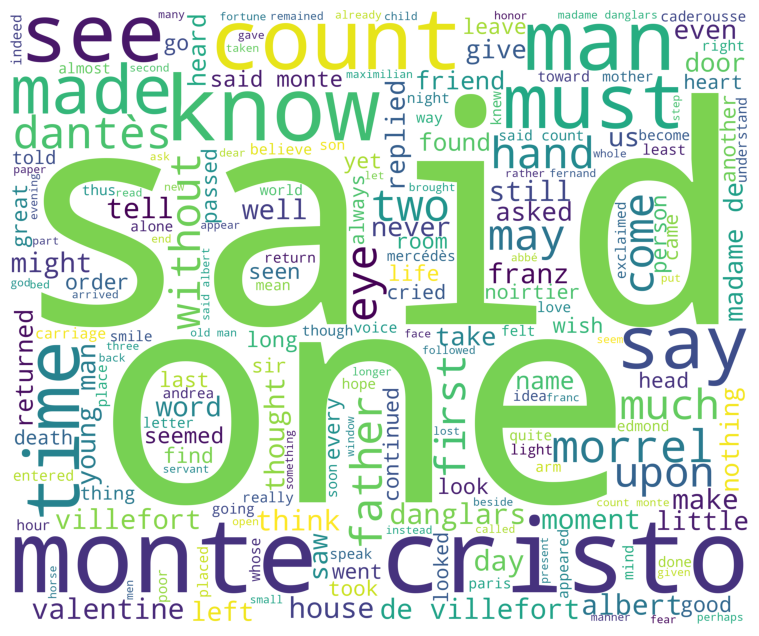

In [ ]:
fig = plt.figure(figsize=(20, 8))
plt.imshow(wordcloud)
plt.axis("off")

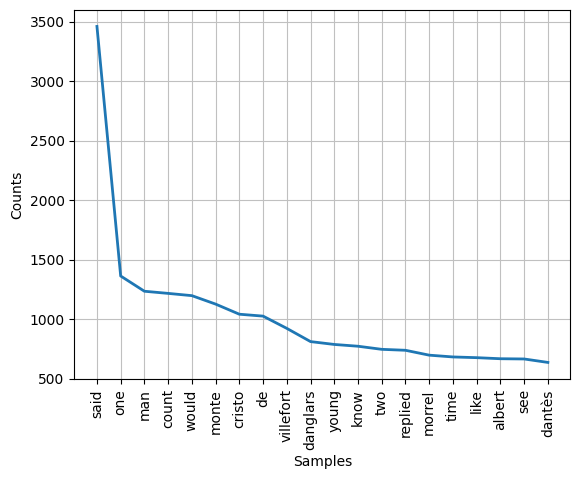

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
frequnecy_distribution.plot(20)

In [ ]:
# creating word sequences (input - 50 words, outcome - a word)
length = 50 + 1
list_sequences = []

for i in range(length, len(list_tokens)):
  # selecting a sequence of tokens
  part_list_tokens = list_tokens[i-length:i]

  # creating a sequence
  sequence = " ".join(part_list_tokens)
  list_sequences.append(sequence)    

In [ ]:
print("number of sequences:", len(list_sequences))

number of sequences: 198683


In [ ]:
# writing word sequences to a file
path = Path("/content/drive/MyDrive/Colab Notebooks/AI/Text files/The Count sequences.txt")
write_file(path, list_sequences)

In [ ]:
# loading the file
text = read_file(path)
list_sequences = text.split("\n")
list_sequences[:3]

['chapter arrival february lookout notredame de la garde signalled threemaster pharaon smyrna trieste naples usual pilot put immediately rounding château got board vessel cape morgiou rion island immediately according custom ramparts fort saintjean covered spectators always event marseilles ship come port especially ship like pharaon built rigged laden old phocee docks',
 'arrival february lookout notredame de la garde signalled threemaster pharaon smyrna trieste naples usual pilot put immediately rounding château got board vessel cape morgiou rion island immediately according custom ramparts fort saintjean covered spectators always event marseilles ship come port especially ship like pharaon built rigged laden old phocee docks belongs',
 'february lookout notredame de la garde signalled threemaster pharaon smyrna trieste naples usual pilot put immediately rounding château got board vessel cape morgiou rion island immediately according custom ramparts fort saintjean covered spectators 

In [ ]:
# tokenizing the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list_sequences)
list_tokenized_sequences = tokenizer.texts_to_sequences(list_sequences)
print(list_tokenized_sequences[:3])

[[267, 736, 2206, 5290, 15718, 8, 239, 15717, 7462, 9754, 703, 3822, 6170, 1497, 326, 2620, 199, 292, 15716, 702, 735, 734, 432, 2987, 6169, 15715, 289, 292, 693, 1674, 9753, 6168, 9752, 480, 1745, 118, 1230, 368, 1268, 54, 1840, 916, 1268, 17, 703, 2121, 15714, 4644, 43, 15713, 9756], [736, 2206, 5290, 15718, 8, 239, 15717, 7462, 9754, 703, 3822, 6170, 1497, 326, 2620, 199, 292, 15716, 702, 735, 734, 432, 2987, 6169, 15715, 289, 292, 693, 1674, 9753, 6168, 9752, 480, 1745, 118, 1230, 368, 1268, 54, 1840, 916, 1268, 17, 703, 2121, 15714, 4644, 43, 15713, 9756, 2207], [2206, 5290, 15718, 8, 239, 15717, 7462, 9754, 703, 3822, 6170, 1497, 326, 2620, 199, 292, 15716, 702, 735, 734, 432, 2987, 6169, 15715, 289, 292, 693, 1674, 9753, 6168, 9752, 480, 1745, 118, 1230, 368, 1268, 54, 1840, 916, 1268, 17, 703, 2121, 15714, 4644, 43, 15713, 9756, 2207, 867]]


In [ ]:
# vocabulary size = number of classes
NUMBER_CLASSES = len(tokenizer.word_index) + 1
print("number of classes:", NUMBER_CLASSES)

number of classes: 15720


In [ ]:
arr_sequences = np.array([list_tokenized_sequences])
dataset_train, labels_train = arr_sequences[:, :-1], arr_sequences[:, -1]

# converting the labels to binary matrixes
labels_train = to_categorical(labels_train, num_classes=NUMBER_CLASSES)
sequence_length = dataset_train.shape[1]
print("sequence length:", sequence_length)

[[  267   736  2206 ...    43 15713  9756]
 [  736  2206  5290 ... 15713  9756  2207]
 [ 2206  5290 15718 ...  9756  2207   867]
 ...
 [  157     4   104 ...  3485  9755    13]
 [    4   104  1020 ...  9755    13    93]
 [  104  1020  1004 ...    13    93   206]]
sequence length: 198682


In [ ]:
# an error with the shape of LSTM
input_layer_shape = (dataset_train.shape[1:])
model = Sequential([
    # Input(sequence_length, length),
    Embedding(NUMBER_CLASSES, 50, input_length=sequence_length),
    # Flatten(),
    # LSTM(100, return_sequences=True),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dense(64, activation="relu", kernel_initializer="he_uniform"),
    Dense(NUMBER_CLASSES, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 198682, 50)        786000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 198682, 200)      120800    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 198682, 64)        12864     
                                                                 
 dense_11 (Dense)            (None, 198682, 15720)     1021800   
                                                                 
Total params: 1,941,464
Trainable params: 1,941,464
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(dataset_train, labels_train, epochs=30, batch_size=1024)

Epoch 1/30


ValueError: ignored